<a href="https://colab.research.google.com/github/pradhansankalp10/Time-Series-Analysis/blob/main/Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import zipfile
import os
dataset_zip_path = '/content/Ecommerce sales.zip'

extract_dir = '/content/Sankalp'

os.makedirs(extract_dir, exist_ok=True)

with zipfile.ZipFile(dataset_zip_path, 'r') as zip_ref:
  zip_ref.extractall(extract_dir)

print(f"Dataset unzipped to: {extract_dir}")

Dataset unzipped to: /content/Sankalp


<ipython-input-6-56a3ed8168a2>:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales.index = pd.date_range(start='2023-01', periods=12, freq='M')  # Adjust the start date if needed
<ipython-input-6-56a3ed8168a2>:20: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  extended_sales.index = pd.date_range(start='2023-01', periods=24, freq='M')


<Figure size 1200x800 with 0 Axes>

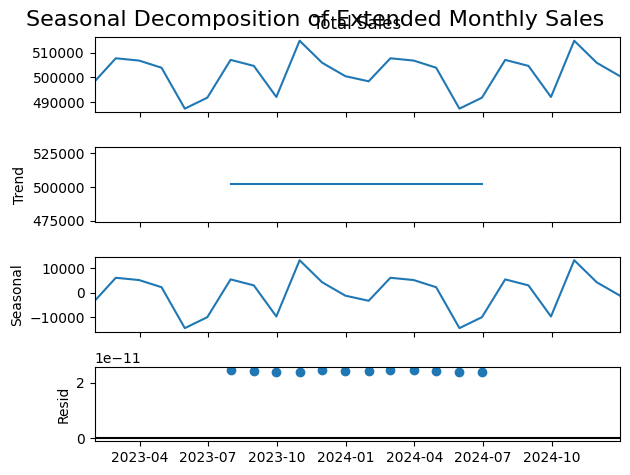

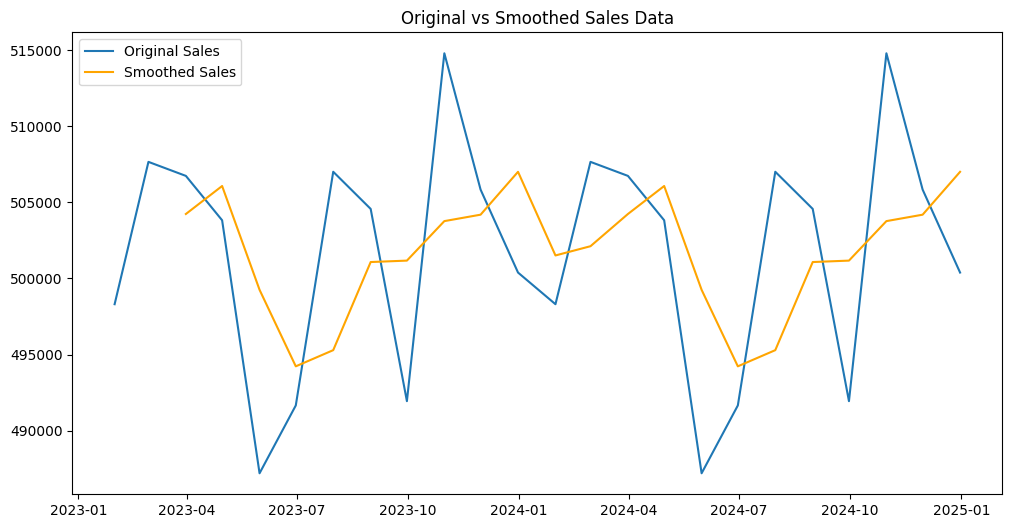

                               SARIMAX Results                                
Dep. Variable:            Total Sales   No. Observations:                   24
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -248.657
Date:                Mon, 04 Nov 2024   AIC                            509.315
Time:                        14:44:22   BIC                            516.128
Sample:                    01-31-2023   HQIC                           511.028
                         - 12-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0158      0.063      0.251      0.802      -0.107       0.139
ar.L2         -0.0071      0.048     -0.150      0.881      -0.100       0.086
ar.L3         -0.0033      0.091     -0.036      0.9

<ipython-input-6-56a3ed8168a2>:58: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(extended_sales.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='M'),


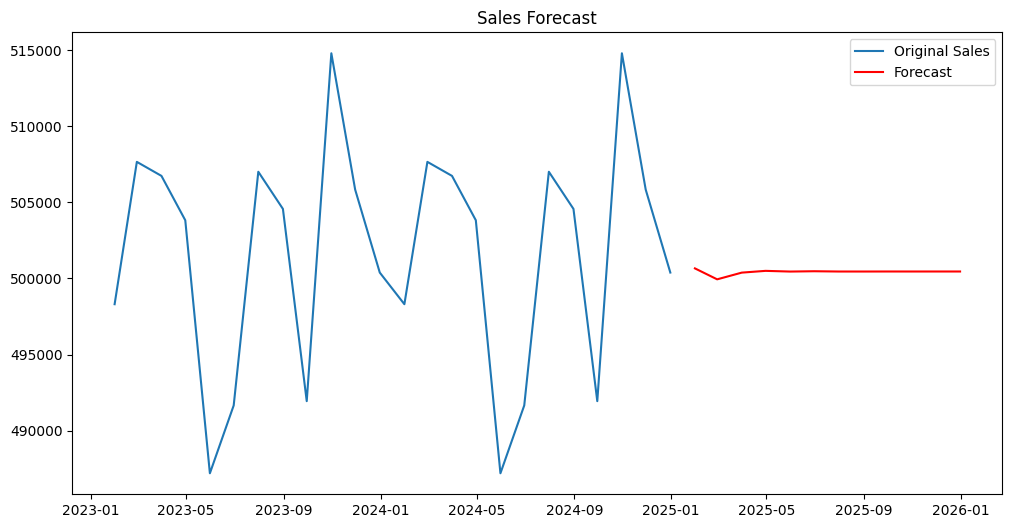

In [6]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

df = pd.read_csv('/content/Sankalp/ecommerce_sales_analysis.csv')

monthly_sales = df.loc[:, 'sales_month_1':'sales_month_12'].sum(axis=0)

monthly_sales.index = pd.date_range(start='2023-01', periods=12, freq='M')
monthly_sales.name = 'Total Sales'

extended_sales = pd.concat([monthly_sales, monthly_sales], ignore_index=True)
extended_sales.index = pd.date_range(start='2023-01', periods=24, freq='M')

decomposition = seasonal_decompose(extended_sales, model='additive', period=12)

plt.figure(figsize=(12, 8))
decomposition.plot()
plt.suptitle("Seasonal Decomposition of Extended Monthly Sales", fontsize=16)
plt.show()

window_size = 3
smoothed_sales = extended_sales.rolling(window=window_size).mean()

plt.figure(figsize=(12, 6))
plt.plot(extended_sales, label='Original Sales')
plt.plot(smoothed_sales, label='Smoothed Sales', color='orange')
plt.title("Original vs Smoothed Sales Data")
plt.legend()
plt.show()

model = ARIMA(extended_sales, order=(5, 1, 0))
model_fit = model.fit()

print(model_fit.summary())
forecast_steps = 12
forecast = model_fit.forecast(steps=forecast_steps)

plt.figure(figsize=(12, 6))
plt.plot(extended_sales, label='Original Sales')
plt.plot(pd.date_range(extended_sales.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='M'),
         forecast, label='Forecast', color='red')
plt.title("Sales Forecast")
plt.legend()
plt.show()


<ipython-input-7-43a9826529f2>:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(extended_sales.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='M')


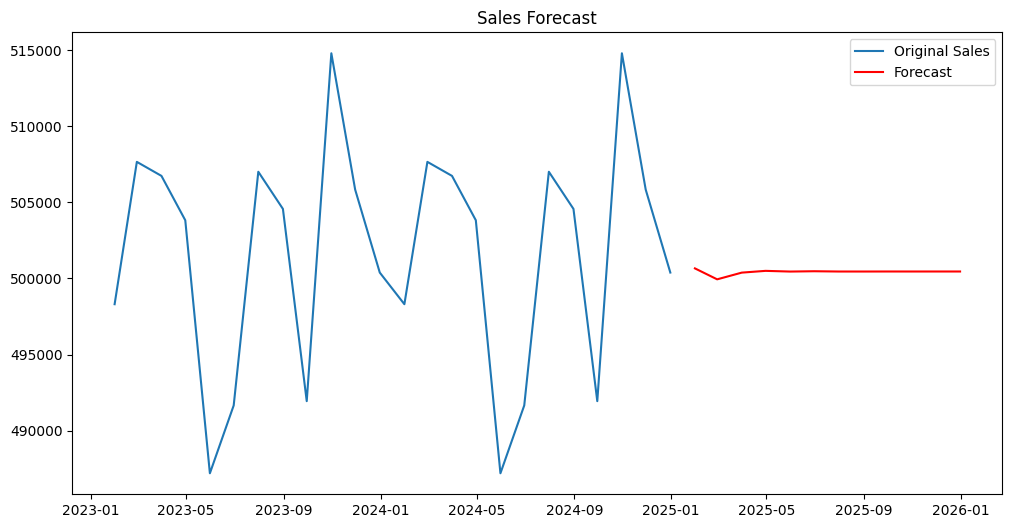

Mean Absolute Error (MAE): 6735.28
Mean Squared Error (MSE): 61451170.61
Root Mean Squared Error (RMSE): 7839.08


In [7]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

forecast_steps = 12
forecast = model_fit.forecast(steps=forecast_steps)
forecast_index = pd.date_range(extended_sales.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='M')

plt.figure(figsize=(12, 6))
plt.plot(extended_sales, label='Original Sales')
plt.plot(forecast_index, forecast, label='Forecast', color='red')
plt.title("Sales Forecast")
plt.legend()
plt.show()

actual_sales = extended_sales[-12:]
forecasted_sales = forecast[:12]

mse = mean_squared_error(actual_sales, forecasted_sales)
mae = mean_absolute_error(actual_sales, forecasted_sales)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
